<a href="https://colab.research.google.com/github/SproutCoder/q4.0/blob/main/farben_lernen_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Farbklassifizierung mit Perzeptron in Python verstehen (3D)


**Beschreibung**:

Willkommen zu diesem interaktiven Notebook zur Verwendung von Perzeptronen, einer Art von einschichtigen neuronalen Netzwerken, um Farben linear zu trennen. In diesem Notizbuch konzentrieren wir uns darauf, zwischen zwei Grundfarben zu unterscheiden: Rot und Blau, basierend auf ihren RGB-Werten. Wir verwenden ein vereinfachtes Modell, das nur die roten und blauen Komponenten der Farben berücksichtigt, was es zu einem zweidimensionalen Problem macht. Dieser Ansatz bietet ein grundlegendes Verständnis dafür, wie Perzeptronen Daten linear klassifizieren können.

**Was wir abdecken**:

* Datenvorbereitung: Wir beginnen damit, einen Datensatz aus roten und blauen Farben in einem 2D-Raum zu erstellen und zu visualisieren.
* Perzeptron-Modell: Wir führen das Konzept eines Perzeptrons ein, implementieren es von Grund auf und trainieren es, um die roten und blauen Datenpunkte zu trennen.
* Entscheidungsgrenze: Wir visualisieren die Entscheidungsgrenze, die durch das Perzeptron erstellt wurde, um zu verstehen, wie es zwischen den beiden Farben unterscheidet.
* Animation: Wir erstellen eine Animation, um den schrittweisen Prozess des Perzeptrons beim Erlernen der Farbtrennung zu demonstrieren.
* Evaluation (tbd): Wir bewerten die Leistung des Perzeptrons, indem wir korrekte Klassifizierungen und Fehlklassifizierungen betrachten.

**Ausblick**:

In späteren Versionen dieses Notebooks planen wir:
* Die grüne Komponente einzubeziehen, wodurch unser 2D-Problem zu einem 3D-Problem wird und eine umfassendere Farbtrennung ermöglicht.
* Nicht-lineare Trenner zu erkunden, indem wir unser einfaches Perzeptron auf komplexere neuronale Netzwerkarchitekturen aufrüsten.


Dieses Notizbuch ist für Personen gedacht, die die Grundlagen neuronaler Netzwerke und ihre Anwendung in der Farbklassifikation verstehen möchten. Die aktuelle Version ist vor allem für interne Zwecke gedacht und zur Weiterentwicklung und Veranschaulichung von Lehrmaterial.

## 1. Vorbereitung und Visualisierung der Farbdaten

In diesem Abschnitt konzentrieren wir uns auf die Auswahl und Visualisierung von Farbdaten, die als Grundlage für das Training unseres Perzeptron-Modells dienen. Die Farbtöne, die wir verwenden, sind vordefinierte HTML- und CSS-Farbnamen, deren Werte die online gefunden werden können. Wir werden diese Farben in einen für das maschinelle Lernen geeignetes Format bringen, sie in Trainings- und Testdaten unterteilen und visualisieren, um ein intuitives Verständnis der Aufgabe zu gewinnen.

**Farbton-Auswahl:**
Für unsere Analyse haben wir vordefinierte Farbtöne aus HTML und CSS verwendet. Diese Farben sind allgemein anerkannte Standards im Webdesign und bieten eine breite Palette an nuancierten Farbtönen, die sich gut für unsere Zwecke eignen. Die spezifischen RGB-Werte für die roten und blauen Farbtöne, die wir untersuchen, können auf Seiten wie [RapidTables](https://www.rapidtables.com/web/color/red-color.html) gefunden werden. Diese Quelle bietet eine umfassende Liste von Farbcodes und ihren jeweiligen visuellen Darstellungen, was sie zu einem hilfreichem Werkzeug für unser Projekt macht.

Hier sind zum Beispiel die verwendeten RGB-Werte für Rot.

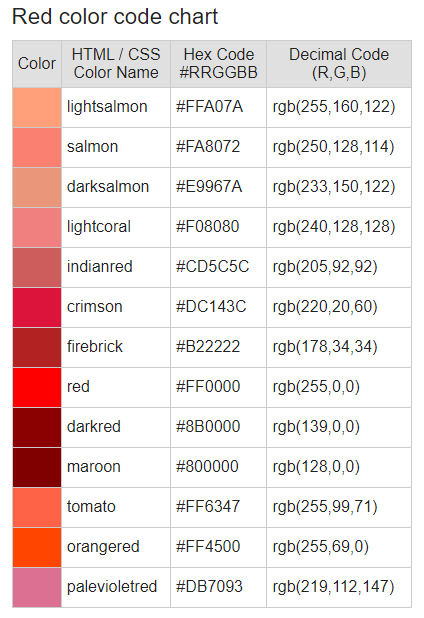

**Datenstrukturierung**:
Wir werden die RGB-Werte der ausgewählten roten und blauen Farbtöne in NumPy-Arrays umwandeln. Jeder Farbton wird durch ein Tupel (R, G, B) repräsentiert, wobei R, G und B die Intensitätswerte der roten, grünen und blauen Komponenten sind.

In [2]:
import numpy as np

In [3]:
# define Red color values
red_values = np.array([
    [255, 160, 122], [250, 128, 114], [233, 150, 122], [240, 128, 128],
    [205, 92, 92], [220, 20, 60], [178, 34, 34], [255, 0, 0],
    [139, 0, 0], [128, 0, 0], [255, 99, 71], [255, 69, 0], [219, 112, 147]
])

# Defining Green color values
green_values = np.array([
    [124, 252, 0], [127, 255, 0], [50, 205, 50], [0, 255, 0],
    [34, 139, 34], [0, 128, 0], [0, 100, 0], [173, 255, 47],
    [154, 205, 50], [0, 255, 127], [0, 250, 154], [144, 238, 144],
    [152, 251, 152], [143, 188, 143], [60, 179, 113], [32, 178, 170],
    [46, 139, 87], [128, 128, 0], [85, 107, 47], [107, 142, 35]
])

# define Blue color values
blue_values = np.array([
    [240, 248, 255], [230, 230, 250], [176, 224, 230], [173, 216, 230],
    [135, 206, 250], [135, 206, 235], [0, 191, 255], [176, 196, 222],
    [30, 144, 255], [100, 149, 237], [70, 130, 180], [95, 158, 160],
    [123, 104, 238], [106, 90, 205], [72, 61, 139], [65, 105, 225],
    [0, 0, 255], [0, 0, 205], [0, 0, 139], [0, 0, 128], [25, 25, 112],
    [138, 43, 226], [75, 0, 130]
])

#red_values, blue_values, green_values

Jetzt visualisieren wir die Daten in einem 3D-Graphen:

In [4]:
import plotly.graph_objs as go

# Create traces for red and blue colors
trace_red = go.Scatter3d(
    x=red_values[:, 0], y=red_values[:, 1], z=red_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Red Colors'
)

trace_green = go.Scatter3d(
    x=green_values[:, 0], y=green_values[:, 1], z=green_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.8),
    name='Green Colors'
)

trace_blue = go.Scatter3d(
    x=blue_values[:, 0], y=blue_values[:, 1], z=blue_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Blue Colors'
)

# Define the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Red Value'),
        yaxis=dict(title='Green Value'),
        zaxis=dict(title='Blue Value')
    ),
    title='Interactive 3D Scatter Plot of Red and Blue Colors'
)

# Create the figure and display it
fig = go.Figure(data=[trace_red, trace_green, trace_blue], layout=layout)
fig.show()

**Hinzufügen von Labels**:

Jedem Datenpunkt wird ein Label zugeordnet, das angibt, ob es sich um eine rote oder blaue Farbe handelt. Dies ist ein entscheidender Schritt, da diese Labels dem Perzeptron während des Trainings als Referenz dienen, um zu lernen, wie die Farben zu klassifizieren sind. Wir nutzen als Label die Zahlen 0 und 1, un dnicht 'blau' und 'rot', weil das Perzeptron nur mit Zahlen umgehen kann.

In [9]:
# Add labels to the simplified red and blue values
# Label for red is 0, for green is 1, and for blue is 2 (note that in the 2d case blue was 1 and not 2)
red_labeled_values = np.array([[r, g, b, 0] for r, g, b in red_values])
blue_labeled_values = np.array([[r, g, b, 2] for r, g, b in blue_values])
green_labeled_values = np.array([[r, g, b, 1] for r, g, b in green_values])

red_labeled_values, green_labeled_values,  blue_labeled_values

(array([[255, 160, 122,   0],
        [250, 128, 114,   0],
        [233, 150, 122,   0],
        [240, 128, 128,   0],
        [205,  92,  92,   0],
        [220,  20,  60,   0],
        [178,  34,  34,   0],
        [255,   0,   0,   0],
        [139,   0,   0,   0],
        [128,   0,   0,   0],
        [255,  99,  71,   0],
        [255,  69,   0,   0],
        [219, 112, 147,   0]]),
 array([[124, 252,   0,   1],
        [127, 255,   0,   1],
        [ 50, 205,  50,   1],
        [  0, 255,   0,   1],
        [ 34, 139,  34,   1],
        [  0, 128,   0,   1],
        [  0, 100,   0,   1],
        [173, 255,  47,   1],
        [154, 205,  50,   1],
        [  0, 255, 127,   1],
        [  0, 250, 154,   1],
        [144, 238, 144,   1],
        [152, 251, 152,   1],
        [143, 188, 143,   1],
        [ 60, 179, 113,   1],
        [ 32, 178, 170,   1],
        [ 46, 139,  87,   1],
        [128, 128,   0,   1],
        [ 85, 107,  47,   1],
        [107, 142,  35,   1]]),
 array

**Aufteilung in Trainings- und Testdaten:**

Um das Modell effektiv trainieren und bewerten zu können, teilen wir die Daten in einen Trainings- und einen Testsatz auf. Der Trainingsdatensatz wird verwendet, um das Perzeptron zu trainieren, während der Testsatz dazu dient, die Leistung des trainierten Modells unabhängig zu bewerten. Anschließend werden die aufgeteilten Daten visualisert.

In [10]:
from sklearn.model_selection import train_test_split

# Merge the labeled red and blue values into one
all_data = np.vstack((red_labeled_values, green_labeled_values, blue_labeled_values))

# Split features and labels
X = all_data[:, :3]  # features (R, G, B)
y = all_data[:, 3]   # labels (0 for red, 1 for green, 2 for blue)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Now X_train and y_train can be used for training the model,
# and X_test and y_test for evaluating its performance.

In [13]:
import plotly.graph_objs as go
import numpy as np

def create_trace(values, labels, set_type, color_index, color, name):
    # Ensure labels are in the correct format for comparison
    labels = np.array(labels).flatten()  # Flatten labels to 1D if not already
    color_index = int(color_index)  # Ensure color_index is an integer for comparison

    # Filter the values based on the color_index
    filtered_values = values[labels == color_index]

    marker_symbol = 'circle' if set_type == 'train' else 'square'
    trace = go.Scatter3d(
        x=filtered_values[:, 0],
        y=filtered_values[:, 1],
        z=filtered_values[:, 2],
        mode='markers',
        marker=dict(size=5, color=color, opacity=0.8, symbol=marker_symbol),
        name=f'{name} {set_type.capitalize()}'
    )
    return trace

# Assuming the following setup (replace with your actual data)
# X_train, X_test = np.random.rand(100, 3), np.random.rand(50, 3)
# y_train, y_test = np.random.choice([0, 1, 2], 100), np.random.choice([0, 1, 2], 50)

# Create traces for red, green, and blue colors for both training and test sets
trace_red_train = create_trace(X_train, y_train, 'train', 0, 'red', 'Red Colors')
trace_green_train = create_trace(X_train, y_train, 'train', 1, 'green', 'Green Colors')
trace_blue_train = create_trace(X_train, y_train, 'train', 2, 'blue', 'Blue Colors')

trace_red_test = create_trace(X_test, y_test, 'test', 0, 'red', 'Red Colors')
trace_green_test = create_trace(X_test, y_test, 'test', 1, 'green', 'Green Colors')
trace_blue_test = create_trace(X_test, y_test, 'test', 2, 'blue', 'Blue Colors')

# Define the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Red Value'),
        yaxis=dict(title='Green Value'),
        zaxis=dict(title='Blue Value')
    ),
    title='Interactive 3D Scatter Plot of RGB Colors with Training and Test Sets'
)

# Create the figure and display it
fig = go.Figure(data=[
    trace_red_train, trace_green_train, trace_blue_train,
    trace_red_test, trace_green_test, trace_blue_test
], layout=layout)

fig.show()


## 2. Implementierung und Training des Perzeptrons

**Perzeptron-Modell definieren**:

Wir beginnen mit der Definition einer Perzeptron-Klasse in Python. Diese Klasse beinhaltet die Initialisierung der Gewichte und des Bias, die Definition der Aktivierungsfunktion und die Implementierung der Lernregel. Dies bildet das Grundgerüst unseres Klassifikators.

In [19]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters  # Number of iterations over the training set
        self.activation_func = self._unit_step_func  # Activation function
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure labels are only 0 or 1
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):

                # Calculate the linear combination of weights and sample + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)


**Anpassung des Perzeptrons benötigt**:

Die bestehende Perzeptron-Klasse und der Trainingsprozess, die wir implementiert haben, sind für die binäre Klassifizierung (Unterscheidung zwischen zwei Klassen) geeignet. Da wir es aber nun mit einem Mehrklassenproblem zu tun haben (Klassifizierung von Rot, Grün und Blau), sind einige Änderungen erforderlich.

Das klassische Perzeptron, wie wir es implementiert haben, ist von Natur aus ein binärer Klassifikator, d. h. es ist für Probleme mit zwei Klassen (in unserem Fall rot und blau) konzipiert. Für ein Mehrklassenproblem (drei Klassen in unserem Szenario (rot, grün, blau)) haben wir mehrere Optionen:



1.   **One-vs-Rest (OvR)-Ansatz**: Wir können drei separate Perzeptrons erstellen, die jeweils darauf trainiert sind, eine Farbe von den anderen zu unterscheiden. Zum Beispiel ein Perzeptron für rot vs. nicht rot, ein anderes für grün vs. nicht grün und ein drittes für blau vs. nicht blau. Dieser Ansatz kann mit minimalen Änderungen an einer bestehenden Perzeptron-Klasse umgesetzt werden.
2. **Perzeptron für Multi-Klassen modifizieren**: Dazu müsste das Perzeptron so angepasst werden, dass es einen Vektor von Klassenwerten (einen für jede Klasse) ausgibt und eine Mehrklassen-Verlustfunktion wie die Kreuzentropie verwendet. Dieser Ansatz würde jedoch erheblich vom traditionellen Perzeptron-Modell abweichen und wäre möglicherweise komplexer als für unser Projekt erforderlich.





Angesichts der Einfachheit unseres Projekts und des pädagogischen Schwerpunkts starten wir mit den One-vs-Rest-Ansatz:

**Trainingsprozess:**

Nach der Definition des Modells initialisieren wir eine Instanz des Perzeptrons und trainieren sie mit unseren Trainingsdaten. Während des Trainingsprozesses passt das Perzeptron seine Gewichte kontinuierlich an, um die Unterscheidung zwischen den Farben zu optimieren. Dieser Prozess wird in mehreren Iterationen durchgeführt, bis das Modell konvergiert oder eine vorgegebene Anzahl von Durchläufen erreicht.

In [20]:
# Create three Perceptron instances for each color
perceptron_red = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_green = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_blue = Perceptron(learning_rate=0.01, n_iters=1000)

# Train each perceptron
perceptron_red.fit(X_train, y_train == 0)   # Red vs Not Red
perceptron_green.fit(X_train, y_train == 1) # Green vs Not Green
perceptron_blue.fit(X_train, y_train == 2)  # Blue vs Not Blue

**Trainingsergebnisse evaluieren:**

Wir bewerten die Leistung unseres trainierten Perzeptrons, indem wir es auf den Testdatensatz anwenden. [Dabei untersuchen wir, wie gut das Modell die Farben klassifizieren kann, und identifizieren Fälle, in denen es zu Fehlklassifikationen kommt. Diese Analyse hilft uns, die Wirksamkeit des Perzeptrons zu verstehen und mögliche Bereiche für Verbesserungen zu identifizieren.] Außerdem visualisieren wir die Entscheidungsgrenze des Perzeptrons.

In [32]:
def predict_multi_class(X):
    # Get predictions from each perceptron
    red_confidence = perceptron_red.predict(X)
    green_confidence = perceptron_green.predict(X)
    blue_confidence = perceptron_blue.predict(X)

    # Stack and find the index with the highest confidence
    all_confidences = np.vstack([red_confidence, green_confidence, blue_confidence]) # this is not an optimal approach as confidence is either 0 or 1 and there is no rule for ties
    return np.argmax(all_confidences, axis=0)

# Use the multi-class prediction function for predictions
y_pred = predict_multi_class(X_test)
print(y_pred)
print(y_test)
print("Der Vergleich ergibt, dass fälschlich zwei Mal grün (label=1) als rot (label=0) klassifiziert wird.")

[0 0 2 1 1 2 2 0 2 0 2 0 2 0 0 1 0 0 2 1 2 2 2]
[0 0 2 1 1 2 2 1 2 0 2 0 2 1 0 1 0 0 2 1 2 2 2]
Der Vergleich ergibt, dass fälschlich zwei Mal grün (label=1) als rot (label=0) klassifiziert wird.


Der Vergleich ergibt, dass fälschlich zwei Mal grün (label=1) als rot (label=0) klassifiziert wird. Wir visualisieren das Ergebnis der Klassifikaiton der drei Perzeptron:

In [26]:
import plotly.graph_objs as go

# Function to create traces for the correct and incorrect predictions
def create_test_trace(X, y_true, y_pred, color_index, color, name):
    correct = (y_true == y_pred) & (y_true == color_index)
    incorrect = (y_true != y_pred) & (y_true == color_index)

    # Correct predictions
    trace_correct = go.Scatter3d(
        x=X[correct, 0], y=X[correct, 1], z=X[correct, 2],
        mode='markers',
        marker=dict(size=5, color=color, opacity=1, symbol='square'),
        name=f'{name} Correct'
    )

    # Incorrect predictions
    trace_incorrect = go.Scatter3d(
        x=X[incorrect, 0], y=X[incorrect, 1], z=X[incorrect, 2],
        mode='markers',
        marker=dict(size=5, color=color, opacity=1, symbol='x'),
        name=f'{name} Incorrect'
    )

    return trace_correct, trace_incorrect

# Function to create traces for the training data
def create_train_trace(X, y, color_index, color, name):
    filtered = (y == color_index)
    trace = go.Scatter3d(
        x=X[filtered, 0], y=X[filtered, 1], z=X[filtered, 2],
        mode='markers',
        marker=dict(size=5, color=color, opacity=0.5),  # More pale
        name=f'{name} Train'
    )
    return trace

# Create traces for the training data (more pale)
trace_red_train = create_train_trace(X_train, y_train, 0, 'red', 'Red Colors')
trace_green_train = create_train_trace(X_train, y_train, 1, 'green', 'Green Colors')
trace_blue_train = create_train_trace(X_train, y_train, 2, 'blue', 'Blue Colors')

# Create traces for the test data (correct and incorrect predictions)
trace_red_test_correct, trace_red_test_incorrect = create_test_trace(X_test, y_test, y_pred, 0, 'red', 'Red Colors')
trace_green_test_correct, trace_green_test_incorrect = create_test_trace(X_test, y_test, y_pred, 1, 'green', 'Green Colors')
trace_blue_test_correct, trace_blue_test_incorrect = create_test_trace(X_test, y_test, y_pred, 2, 'blue', 'Blue Colors')

# Define the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Red Value'),
        yaxis=dict(title='Green Value'),
        zaxis=dict(title='Blue Value')
    ),
    title='3D Scatter Plot of RGB Colors with Perceptron Predictions'
)

# Create the figure and display it
fig = go.Figure(data=[
    trace_red_train, trace_green_train, trace_blue_train,
    trace_red_test_correct, trace_red_test_incorrect,
    trace_green_test_correct, trace_green_test_incorrect,
    trace_blue_test_correct, trace_blue_test_incorrect
], layout=layout)

fig.show()


Und tatsächlich sehen wir, dass es in der Mitte zwei grüne Punkte gibt, die falsch klassifizeirt wurden und dementsprechend als Kreuze dargestellt werden. Wenn man sich die zwei Daten punkte anschaut, dann fällt auf, dass der eine Punkt die RGB-Werte (128,128,0) hat und der andere die Werte (143,188,143). Der eine Punkt ist also gleichermaßen rot wie grün (jeweils 128) und der andere Punkt hat zwar am meisten grün in sich (188), aber auch viel rot (und blau) (jewils 143).

Die Farbtöne sehen übrigens so aus:

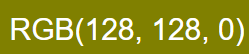


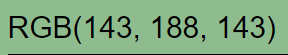

In [46]:
x_1 = [128,128,0]
x_2 = [143,188, 143]
prediction_r_1 = perceptron_red.predict(x_1)
prediction_r_2 = perceptron_red.predict(x_2)
prediction_g_1 = perceptron_green.predict(x_1)
prediction_g_2 = perceptron_green.predict(x_2)
prediction_b_1 = perceptron_blue.predict(x_1)
prediction_b_2 = perceptron_blue.predict(x_2)

print(f'Predictions for data point x_1={x_1}: Red: {prediction_r_1}, Green: {prediction_g_1}, Blue: {prediction_b_1}')
print(f'Predictions for data point x_2={x_2}: Red: {prediction_r_2}, Green: {prediction_g_2}, Blue: {prediction_b_2}')

Predictions for data point x_1=[128, 128, 0]: Red: 1, Green: 1, Blue: 0
Predictions for data point x_2=[143, 188, 143]: Red: 0, Green: 0, Blue: 0


Das bedeutet, dass der Punkt $x_1=[128, 128, 0]$ sowohl als Rot als auch als Grün von den jeweiligen Perzeptronen klassifiziert wurde.
Und dass der Punkt $x_2=[143, 188, 143]$ als weder rot, noch grün, noch blau klassifiziert wurde von den jeweiligen Perzeptronen.

Wir haben eine wichtige Einschränkung bei der Verwendung des One-vs-Rest (OvR)-Ansatzes mit Perzeptrons für die Mehrklassenklassifizierung identifiziert. Bevor wir diese Eintschränkungen und den Umgang damit weiter erörtern, wollen wir erstmal die Entscheidungsgrenzen, die wir für die drei Perzeptrons gelernt haben, visualisieren. Dies wird uns ermöglichen, auch visuell zu zeigen, dass der Datenpunkt $x_1=[128, 128, 0]$ sowohl als rot als auch als grün klassifiziert wird.

**Die Darstellung der Entscheidungsgrenze (in 3D)**:

Das Perzeptron erzeugt eine Entscheidungsgrenze. Im dreidimensionalen Raum ist diese Grenze eine Ebene, die die Klassen voneinander trennt. Die allgemeine Form einer Ebene im Raum wird in der Parameterform dargestellt als:

$\vec{x} = \vec{a} + r \cdot \vec{u} + s \cdot \vec{v}$

Dabei sind $\vec{a}$, $\vec{u}$ und $\vec{v}$ Vektoren, die den Punkt und die Richtung der Ebene im Raum festlegen. Für das Perzeptron, das eine lineare Trennung vornimmt, wird die Ebene durch die Normalenform beschrieben:

$E: \vec{n} \cdot (\vec{x} - \vec{p}) = 0$

Multipliziert man die Normalenform aus, erhält man die Koordinatenform:

$E: a_1x_1 + b_2x_2 + c_3x_3 = d$

Die Koordinatenform ist besonders nützlich, um die Entscheidungsgrenze des Perzeptrons zu visualisieren. Die Koeffizienten $a_1$, $b_2$ und $c_3$ entsprechen den Gewichten des Perzeptrons, und $d$ entspricht dem negativen Bias. Somit lautet die Formel der Entscheidungsgrenze für ein Perzeptron:

$w_1x_1 + w_2x_2 + w_3x_3 + b = 0$

Um diese Ebene in einem 3D-Diagramm darzustellen, löst man nach einer der Variablen auf, in der Regel nach $x_3$ (dem Blauwert), und erhält:

$x_3 = -\frac{w_1}{w_3}x_1 - \frac{w_2}{w_3}x_2 - \frac{b}{w_3}$

In dieser Gleichung repräsentiert $-\frac{w_1}{w_3}$ die Anpassung der Ebene in Richtung der $x_1$-Achse (Rotwert) und $-\frac{w_2}{w_3}$ die Anpassung in Richtung der $x_2$-Achse (Grünwert). Der Term $-\frac{b}{w_3}$ gibt die Verschiebung der Ebene entlang der $x_3$-Achse (Blauwert) an.

Diese Formeln ermöglichen es, die Gewichte und den Bias des trainierten Perzeptrons zu nutzen, um die räumliche Orientierung und Position der Entscheidungsebene zu berechnen und somit eine klare visuelle Abgrenzung der Klassen im 3D-Raum zu schaffen.


In [34]:
# the Perceptron_red values for the red decision boundary (2d plane)
w_red_1, w_red_2, w_red_3 = perceptron_red.weights  # w1 and w2 are the weights for the red and blue values, respectively
b_red = perceptron_red.bias  # b is the bias
print(w_red_1, w_red_2,w_red_3, b_red)

3.9400000000000004 -2.669999999999999 -3.41 -0.01


In [52]:
import numpy as np

def plot_decision_boundary(perceptron, color, name):
    # Create a grid of values
    grid_x1, grid_x2 = np.meshgrid(
        np.linspace(0, 255, 50),  # For Red values
        np.linspace(0, 255, 50)   # For Green values
    )

    # Calculate corresponding Blue values using the plane equation
    grid_x3 = (-perceptron.weights[0] * grid_x1 - perceptron.weights[1] * grid_x2 - perceptron.bias) / perceptron.weights[2]

    # Create a surface trace for the decision boundary
    boundary_trace = go.Surface(
        x=grid_x1, y=grid_x2, z=grid_x3,
        colorscale=[[0, color], [1, color]],
        opacity=0.5,
        name=name,
        showscale = False # as it has only one color no scale is needed
    )
    return boundary_trace

# Assuming we you have perceptron_red, perceptron_green, perceptron_blue from before
boundary_red = plot_decision_boundary(perceptron_red, 'red', 'Red Decision Boundary')
boundary_green = plot_decision_boundary(perceptron_green, 'green', 'Green Decision Boundary')
boundary_blue = plot_decision_boundary(perceptron_blue, 'blue', 'Blue Decision Boundary')

# Update the previous figure code by adding these boundaries
fig = go.Figure(data=[
    trace_red_train, trace_green_train, trace_blue_train,
    trace_red_test_correct, trace_red_test_incorrect,
    trace_green_test_correct, trace_green_test_incorrect,
    trace_blue_test_correct, trace_blue_test_incorrect,
    boundary_red, boundary_green, boundary_blue  # Add the decision boundaries
], layout=layout)

fig.show()


**tbd: Eröterung des Problems, dass der Perceptron bloß eine binäre Klassifikation ermöglciht**:

We've identified a crucial limitation in using the One-vs-Rest (OvR) approach with perceptrons for multi-class classification. The perceptron is fundamentally a binary classifier, so when we extend it to multi-class classification using OvR, we're creating a separate binary classifier for each class. Each perceptron decides whether a data point belongs to its class or not, with no concept of confidence levels beyond the binary 0 or 1.

In situations where multiple perceptrons classify a point as belonging to their class (resulting in a 1), the np.argmax() function will simply pick the first class with the maximum value, which can be arbitrary when there are ties. This is a significant limitation because it doesn't truly understand which class is the most likely; it's just selecting the first one it sees.

**Addressing the Issue:**


**Softmax Function**: One common way to deal with this in multi-class classification is to replace the final activation function with a softmax function, which provides a probability distribution over all classes. However, this isn't a built-in feature of the basic perceptron model and would require moving to a more complex model like a Multi-Layer Perceptron (MLP) with a softmax output layer.

**Confidence Scores**: Instead of using the binary outputs, you could modify the perceptrons to output a continuous confidence score. This could be as simple as taking the raw weighted sum (before the step function) as the confidence. This would give you a degree of "how much" the model thinks a point belongs to a class. The highest confidence score could then determine the class.

**One-vs-One (OvO) Approach**: Instead of OvR, use an OvO strategy where a classifier is trained for every pair of classes. While this involves training more classifiers, it may give a better decision rule when combined with voting or averaging.

**Adjust Decision Thresholds**: Instead of a 0/1 step function, you could use a different threshold for each class, determined by validation data, to better separate the classes. However, this is a more complex route and might not solve the fundamental issue.